In [5]:
from data_transform_classes import DataTransforming, DataFrameInfo, Plotter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import seaborn as sns
file_path = 'altered_loan_payments2.csv'
df = pd.read_csv(file_path)

## *Extracting information from the Dataframe:*

In [6]:
df_info = DataFrameInfo(df)
print("Column Data Types:")
print(df_info.describe_columns())
print("\n")

Column Data Types:
Unnamed: 0                       int64
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                           float64
int_rate                       float64
instalment                     float64
grade                            int64
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_a

In [7]:
print("Statistical Values:")
print(df_info.extract_statistics())
print("\n")

Statistical Values:
         Unnamed: 0            id     member_id   loan_amount  funded_amount  \
count  54231.000000  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   27115.000000  7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    15655.285561  9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min        0.000000  5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    13557.500000  7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    27115.000000  7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    40672.500000  8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    54230.000000  3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv          term      int_rate    instalment  \
count       54231.000000  49459.000000  49062.000000  54231.000000   
mean        12952.622979     42.606199     13.507328    400.013953   
std          8099.473527     10.719573      4.392

In [8]:
print("Distinct Values in Categorical Columns:")
print(df_info.count_distinct_values())
print("\n")

Distinct Values in Categorical Columns:
{'sub_grade': 35, 'employment_length': 11, 'home_ownership': 5, 'verification_status': 3, 'issue_date': 61, 'loan_status': 9, 'payment_plan': 2, 'purpose': 14, 'earliest_credit_line': 587, 'last_payment_date': 98, 'next_payment_date': 96, 'last_credit_pull_date': 102, 'application_type': 1}




In [9]:
df_info.print_shape()
print("\n")

DataFrame shape: (54231, 44)




## *Dropping Null Columns:*

In [10]:
print("NULL Value Counts:")
print(df_info.null_values_count())

NULL Value Counts:
                             Null Count  Null Percentage
Unnamed: 0                            0             0.00
id                                    0             0.00
member_id                             0             0.00
loan_amount                           0             0.00
funded_amount                      3007             5.54
funded_amount_inv                     0             0.00
term                               4772             8.80
int_rate                           5169             9.53
instalment                            0             0.00
grade                                 0             0.00
sub_grade                             0             0.00
employment_length                  2118             3.91
home_ownership                        0             0.00
annual_inc                            0             0.00
verification_status                   0             0.00
issue_date                            0             0.00
loan_status 

In [11]:
null_count = df.isnull().sum()
threshold = 0.5 * len(df)
columns_to_drop = null_count[null_count > threshold].index.tolist()
df.drop(columns=columns_to_drop, inplace=True)
print("\nColumns dropped:")
print(columns_to_drop)
print("\nDataFrame after dropping columns:")
print(df.head())


Columns dropped:
['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']

DataFrame after dropping columns:
   Unnamed: 0        id  member_id  loan_amount  funded_amount  \
0           0  38676116   41461848         8000         8000.0   
1           1  38656203   41440010        13200        13200.0   
2           2  38656154   41439961        16000        16000.0   
3           3  38656128   41439934        15000        15000.0   
4           4  38656121   41439927        15000        15000.0   

   funded_amount_inv  term  int_rate  instalment  grade  ... total_rec_int  \
0             8000.0  36.0      7.49      248.82      1  ...        512.21   
1            13200.0  36.0      6.99      407.52      1  ...        787.94   
2            16000.0  36.0      7.49      497.63      1  ...        824.54   
3            15000.0  36.0     14.31      514.93      3  ...        947.47   
4            15000.0  36.0      6.03      456.54      1

## *Save file to csv:*

In [13]:
#df.to_csv('altered_loan_payments2.csv', index=False)

## *DataFrameTransform Class:*

In [14]:
class DataFrameTransform:
    def __init__(self, df):
        self.df = df

    def impute_nulls(self):
        for column in self.df.columns:
            if self.df[column].isnull().sum() > 0:
                if self.df[column].dtype == 'object':
                    column_mode = self.df[column].mode().iloc[0]
                    self.df[column].fillna(column_mode, inplace=True)
                else:
                    if self.df[column].skew() > 1 or self.df[column].skew() < -1:
                        self.df[column].fillna(self.df[column].mean(), inplace=True)
                    else:
                        self.df[column].fillna(self.df[column].median(), inplace=True)
        return self.df

    def identify_skewed_columns(self,df,threshold=0.5):
        numeric_cols = self.df.select_dtypes(include=np.number).columns
        skewed_cols = []
        for col in numeric_cols:
            skewness = self.df[col].skew()
            if abs(skewness) > threshold:
                skewed_cols.append(col)
        return skewed_cols
                    
    def check_nulls(self):
        null_counts = self.df.isnull().sum()
        print("Remaining NULL counts in each column:")
        print(null_counts)

    def transform_skewed_columns(self, data, skewed_columns):
        transformed_data = data.copy()
        transformations = {}
        
        for col in skewed_columns:
            original_skew = data[col].skew()
            
            # Log transformation
            transformed_data[col + '_log'] = np.log1p(data[col])
            log_skew = transformed_data[col + '_log'].skew()
            transformations[f'{col}_log'] = abs(log_skew - original_skew)
            
            # Square root transformation
            transformed_data[col + '_sqrt'] = np.sqrt(data[col])
            sqrt_skew = transformed_data[col + '_sqrt'].skew()
            transformations[f'{col}_sqrt'] = abs(sqrt_skew - original_skew)
            
            # Box-Cox transformation
            if data[col].min() > 0:  # Box-Cox requires positive values
                transformed_data[col + '_boxcox'], _ = boxcox(data[col])
                boxcox_skew = pd.Series(transformed_data[col + '_boxcox']).skew()
                transformations[f'{col}_boxcox'] = abs(boxcox_skew - original_skew)
        
        best_transformation = min(transformations, key=transformations.get)
        return transformed_data, best_transformation
    
    def apply_best_transformation(self, data, best_transformation):
        transformed_data = data.copy()

        # Apply the best transformation to the corresponding columns
        columns_to_transform = [col for col in transformed_data.columns if best_transformation.split('_')[0] in col]
        if best_transformation.endswith('_log'):
            for col in columns_to_transform:
                transformed_data[col] = np.log1p(data[col.split('_')[0]])
        elif best_transformation.endswith('_sqrt'):
            for col in columns_to_transform:
                transformed_data[col] = np.sqrt(data[col.split('_')[0]])
        elif best_transformation.endswith('_boxcox'):
            for col in columns_to_transform:
                if data[col.split('_')[0]].min() > 0:  # Box-Cox requires positive values
                    transformed_data[col] = boxcox(data[col.split('_')[0]])[0]

        return transformed_data

    def remove_outliers(self, data, column_name, threshold=1.5):
        Q1 = np.percentile(data[column_name], 25)
        Q3 = np.percentile(data[column_name], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filtering out values outside the lower and upper bounds
        filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

        return filtered_data
    
    def remove_highly_correlated(self, data, correlated_columns):
        # Remove highly correlated columns
        filtered_data = data.drop(columns=correlated_columns, axis=1)
        return filtered_data

## *Imputing Null Values:*

In [15]:
data_transformer = DataFrameTransform(df)

# Check NULLs before imputation
nulls_before = data_transformer.check_nulls()

# Save the data before imputation
data_before_imputation1 = df.copy()

# Impute NULLs in DataFrame columns
data_transformer.impute_nulls()

# Check NULLs after imputation
nulls_after = data_transformer.check_nulls()

# Save the data after imputation
data_after_imputation1 = df.copy()

Remaining NULL counts in each column:
Unnamed: 0                       0
id                               0
member_id                        0
loan_amount                      0
funded_amount                 3007
funded_amount_inv                0
term                          4772
int_rate                      5169
instalment                       0
grade                            0
sub_grade                        0
employment_length             2118
home_ownership                   0
annual_inc                       0
verification_status              0
issue_date                       0
loan_status                      0
payment_plan                     0
purpose                          0
dti                              0
delinq_2yrs                      0
earliest_credit_line             0
inq_last_6mths                   0
open_accounts                    0
total_accounts                   0
out_prncp                        0
out_prncp_inv                    0
total_payment    

In [16]:

print(data_before_imputation1.shape)
print(data_after_imputation1.shape)
print(nulls_before)


(54231, 40)
(54231, 40)
None


## *Saving to csv file:*


In [17]:
df.to_csv('altered_loan_payments2.csv', index=False)

## *Comparison of NULL Count before and after imputation:*

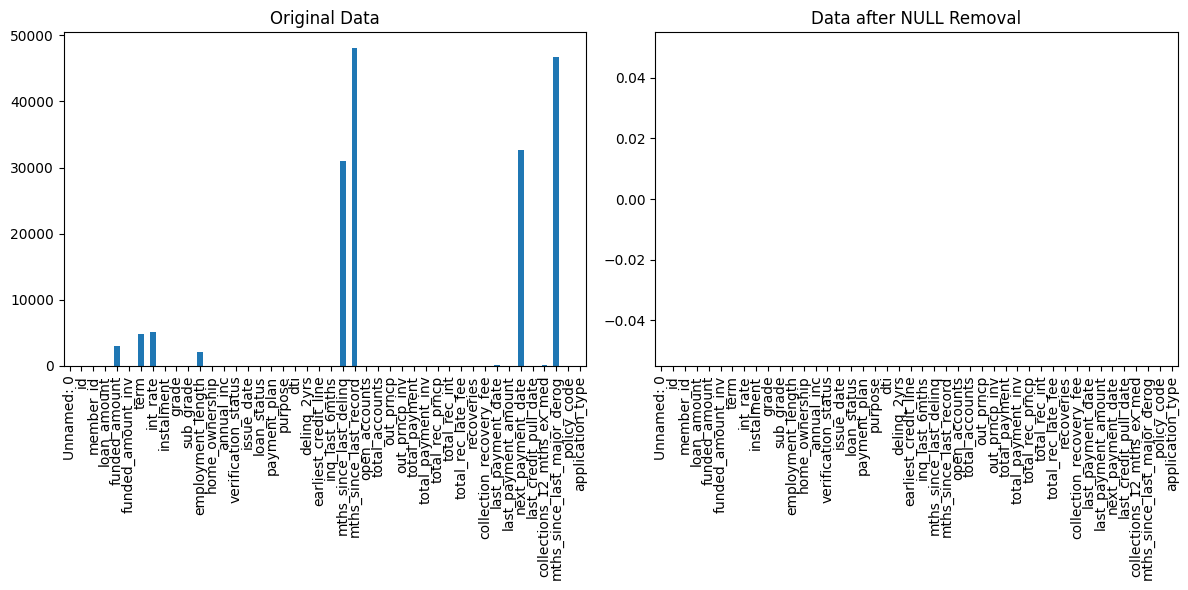

In [6]:
# Create an instance of Plotter and visualize NULL values removal
plot = Plotter()
plot.visualize_nulls(data_before_imputation1, data_after_imputation1)

## *Identify Skewed Columns:*

In [7]:
data_transformer_after_imputation = DataFrameTransform(data_after_imputation1)
skewed_columns = data_transformer_after_imputation.identify_skewed_columns(threshold=0.5)
print("Skewed Columns:")
print(skewed_columns)
data_after_skew = df.copy

Skewed Columns:
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'instalment', 'grade', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']


## *Visualising the Skewness of the Columns:*

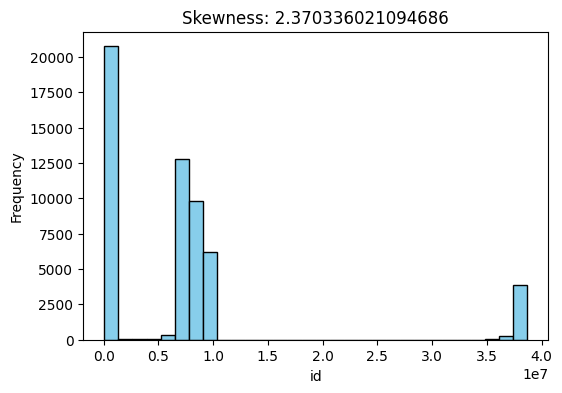

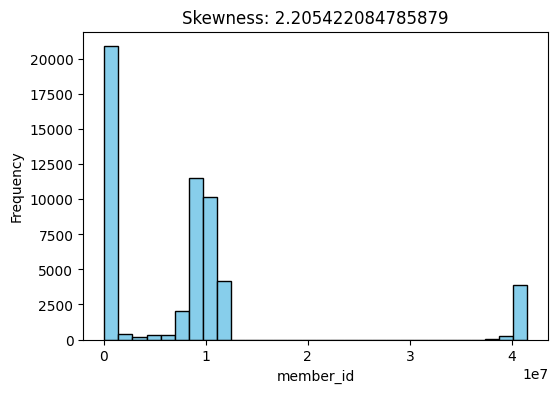

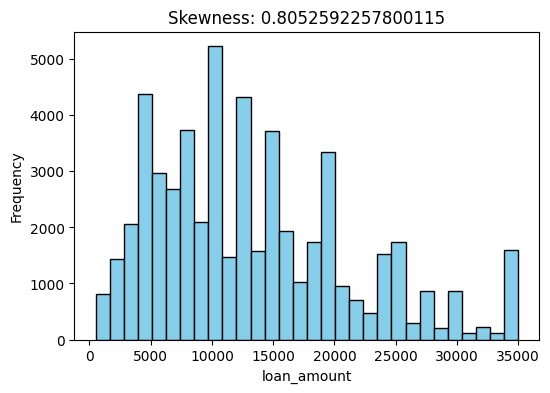

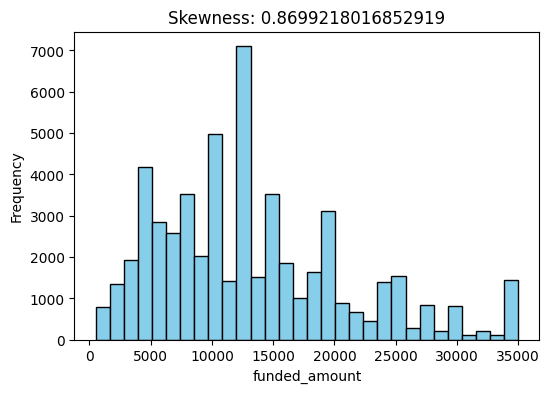

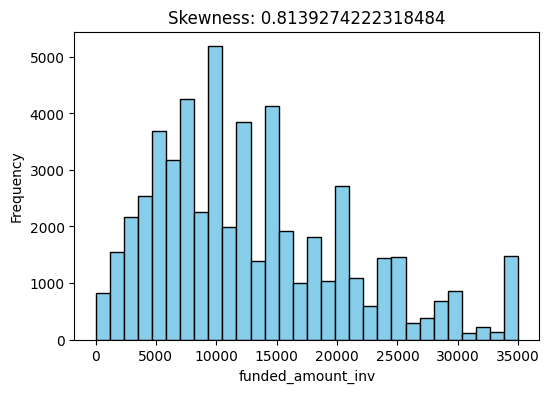

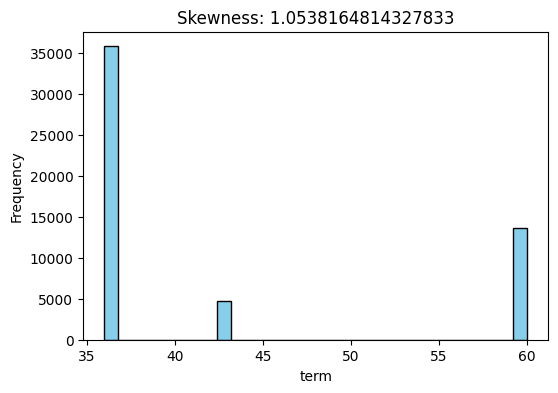

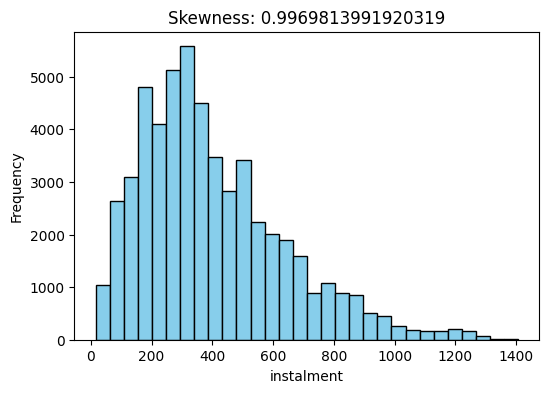

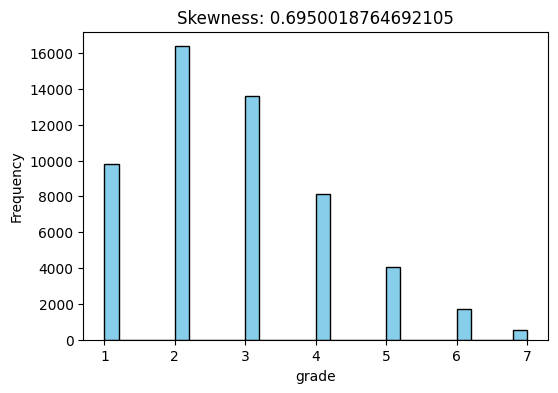

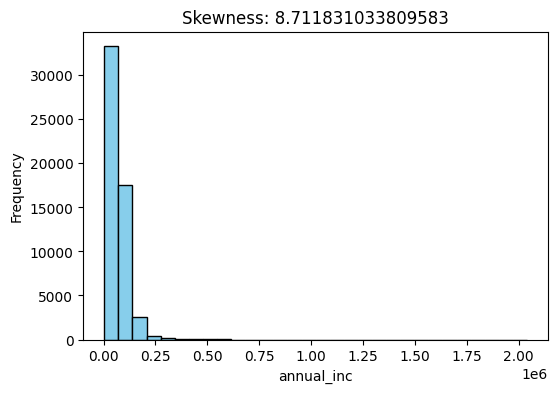

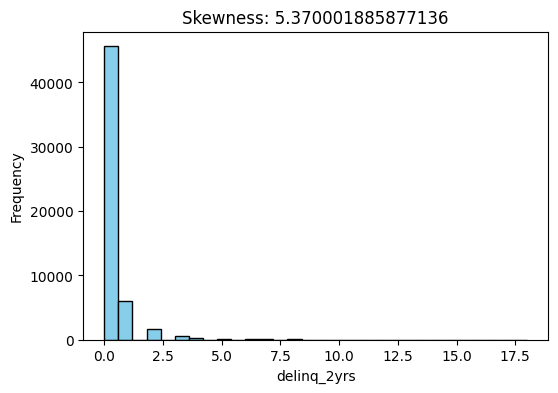

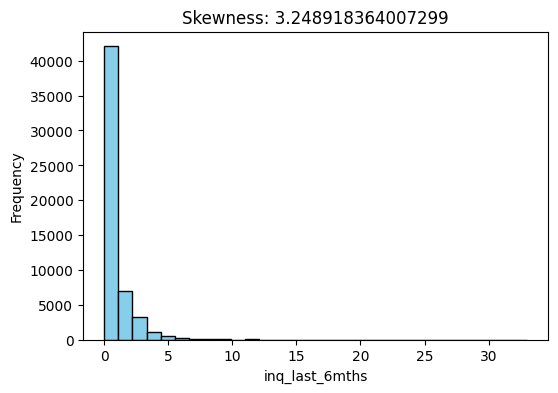

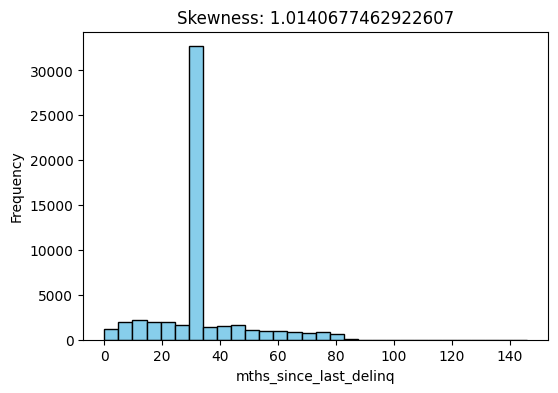

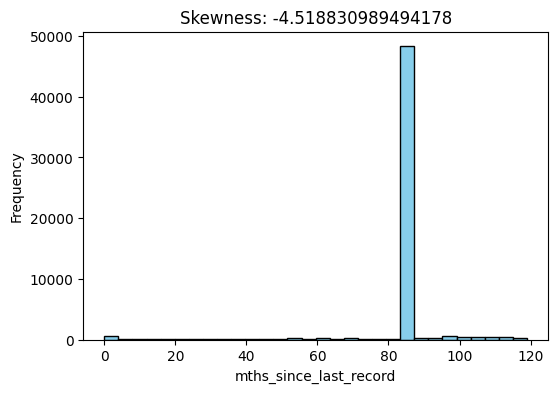

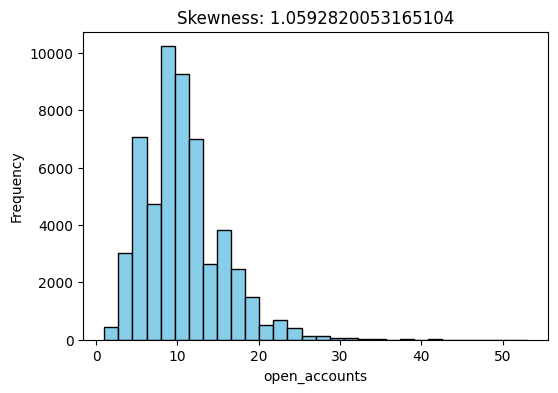

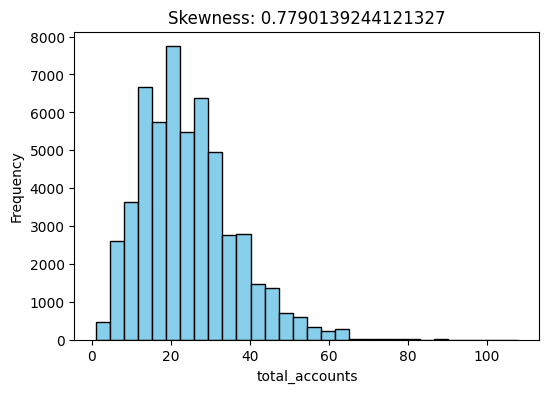

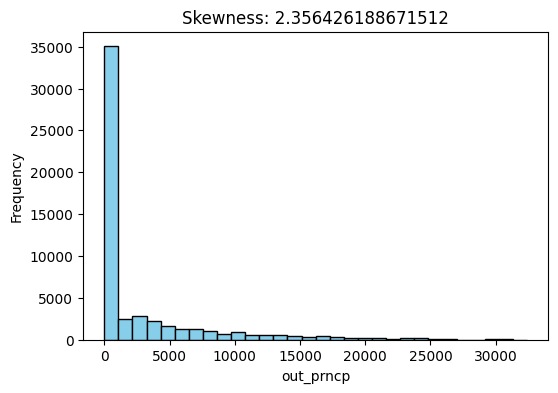

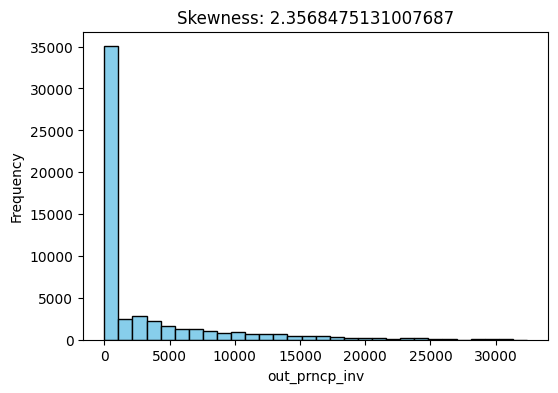

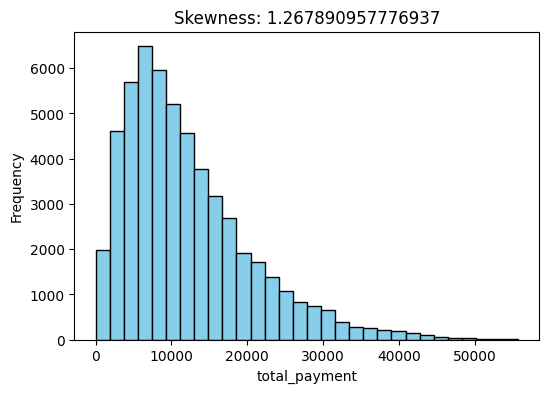

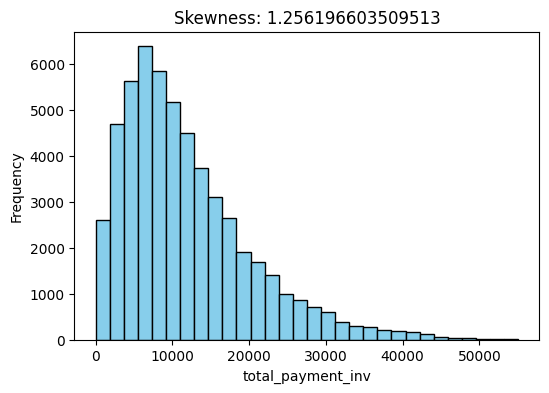

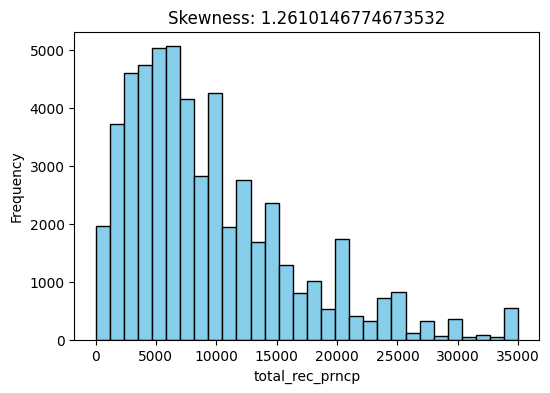

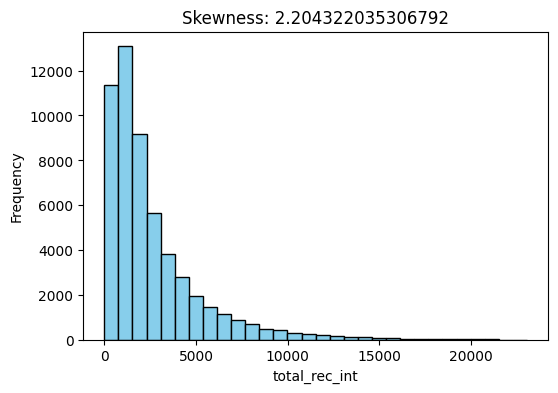

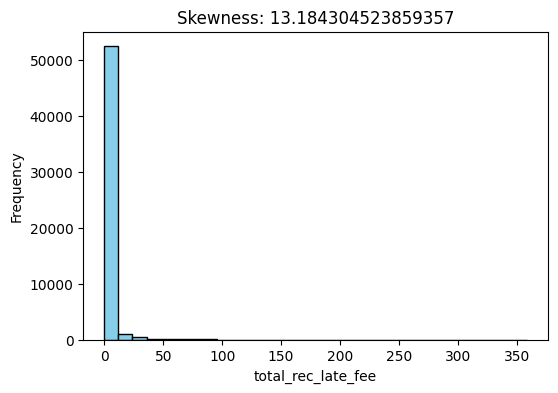

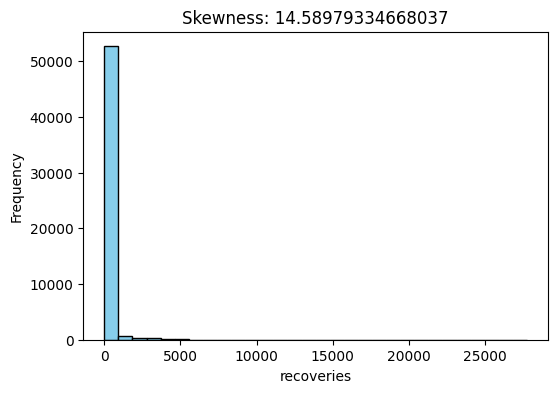

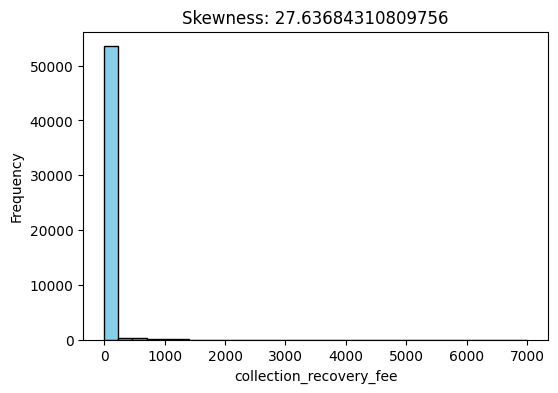

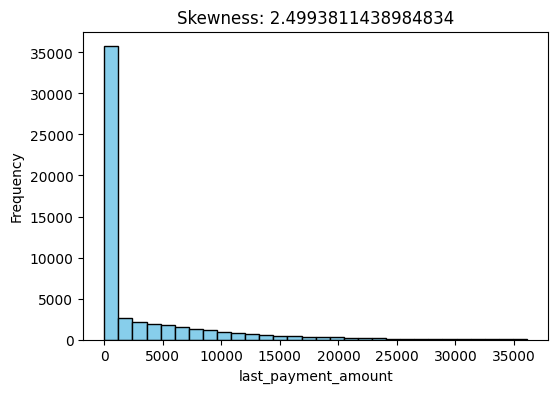

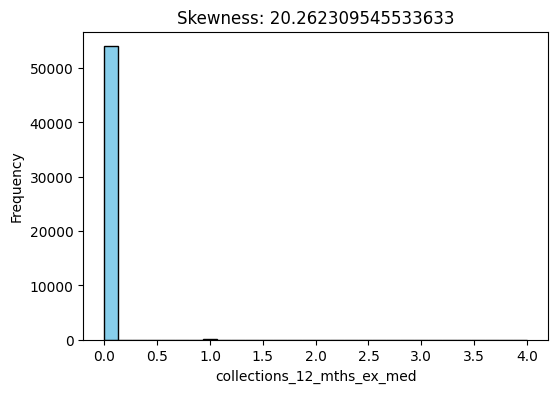

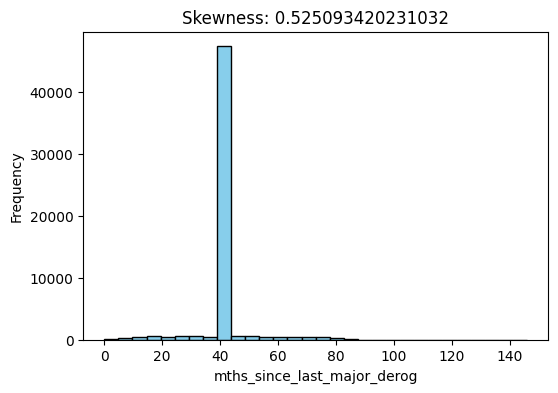

In [8]:
plotter = Plotter()
for col in skewed_columns:
    plotter.visualize_skew(data_after_imputation1, col)

## *Determining which transformation results in the biggest reduction in skew:*

In [13]:
# Initialize DataFrameTransform class
transformer = DataFrameTransform(df)

# Identify skewed columns
skewed_columns = transformer.identify_skewed_columns(df)

# Transform skewed columns and find the best transformation
transformed_df, best_transformation = transformer.transform_skewed_columns(df, skewed_columns)

print(f"The best transformation for skew reduction is: {best_transformation}")


The best transformation for skew reduction is: term_sqrt


## *Applying the identified transformations to the columns to reduce their skewness and Visualizing the data:*

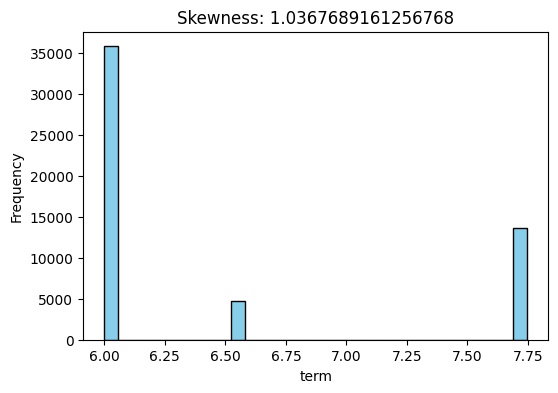

In [15]:
transformer = DataFrameTransform(df)
transformed_df = transformer.apply_best_transformation(df, best_transformation)

for col in transformed_df.columns:
    if best_transformation.split('_')[0] in col:
        plotter.visualize_skew(transformed_df, col)

# Save a separate copy of the transformed DataFrame for comparison
transformed_df.to_csv('transformed_data.csv', index=False)

## *Visualise the data to identify outliers:*


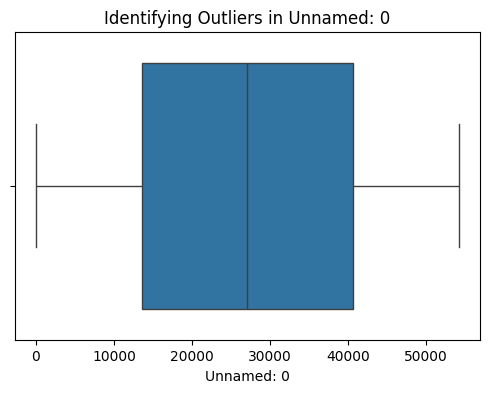

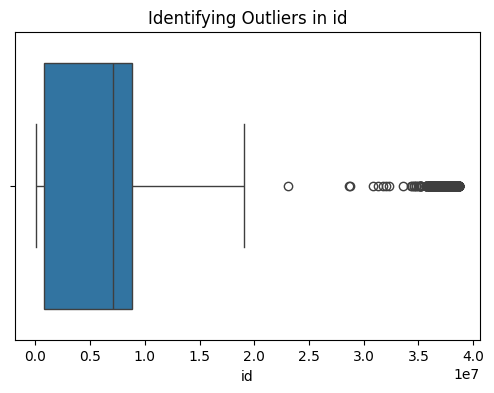

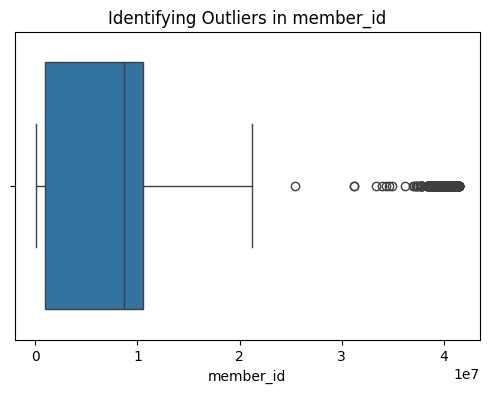

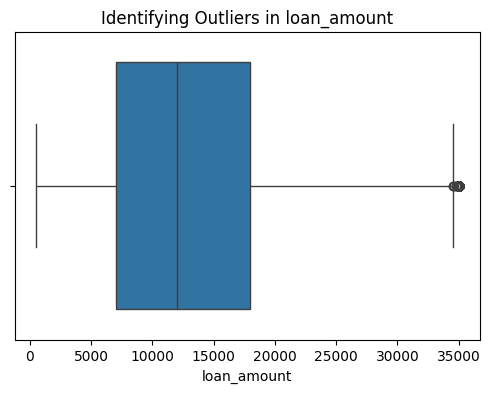

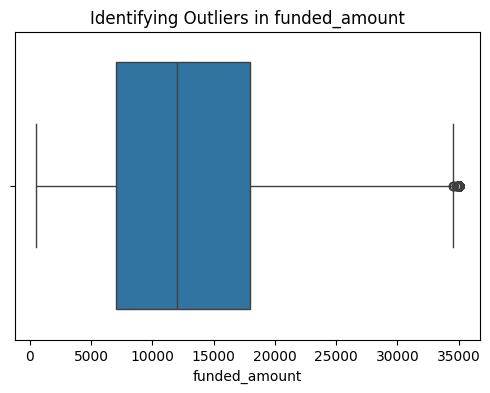

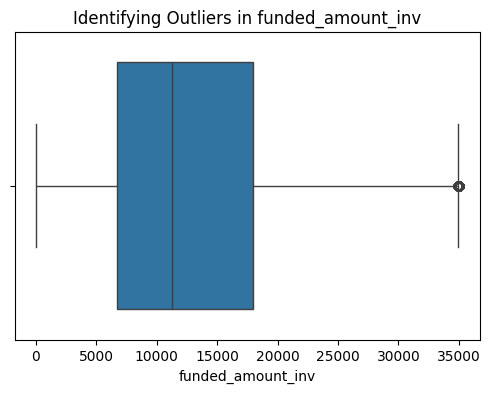

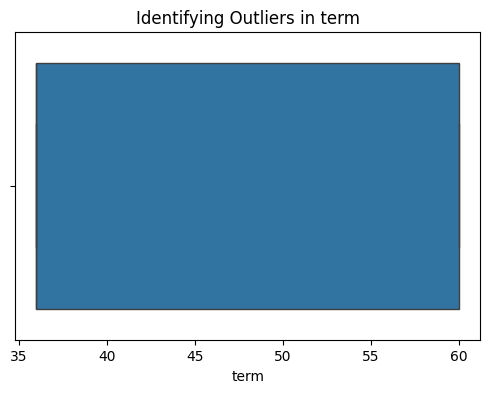

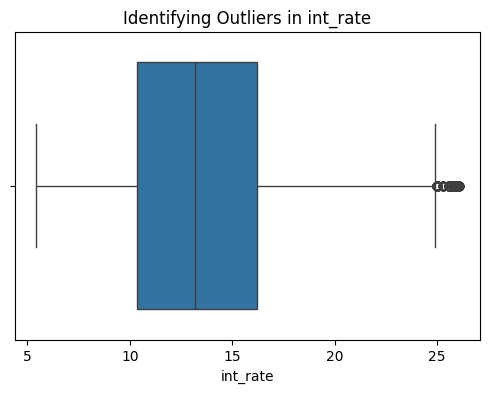

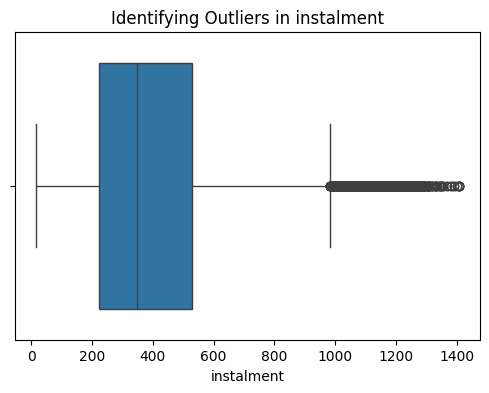

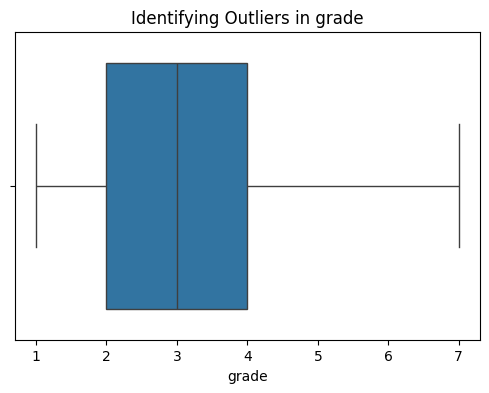

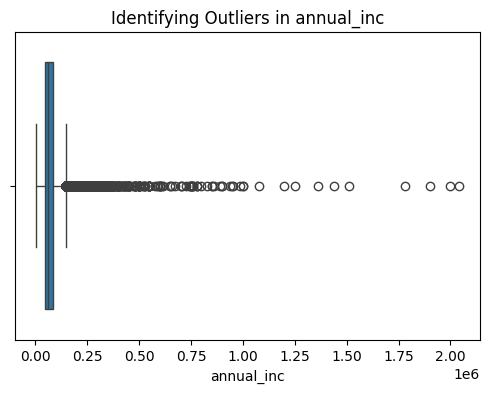

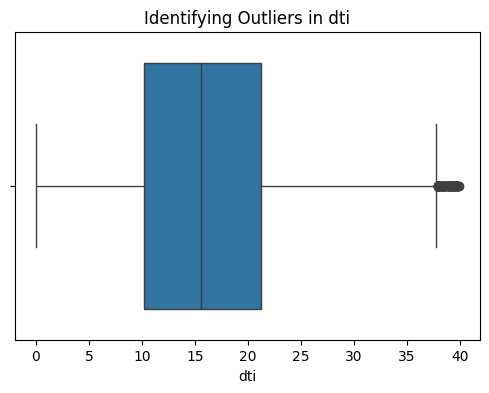

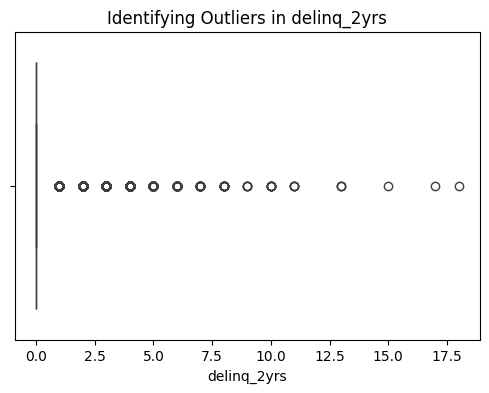

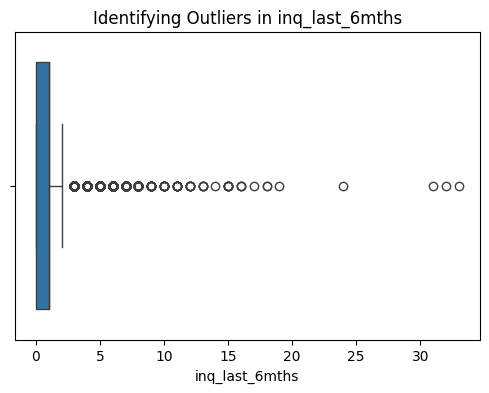

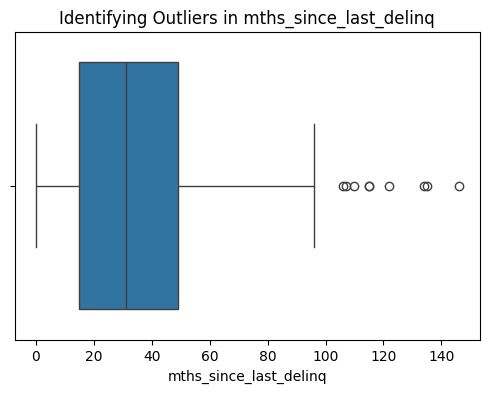

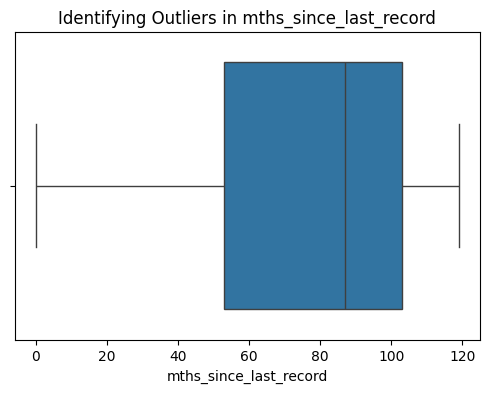

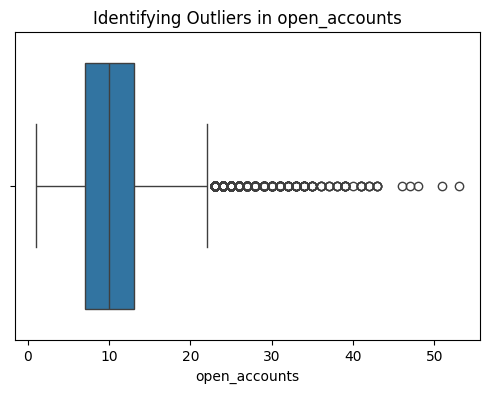

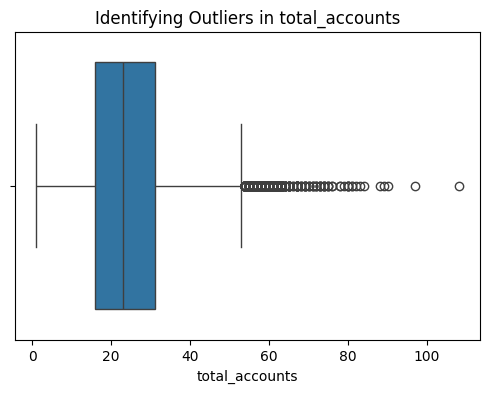

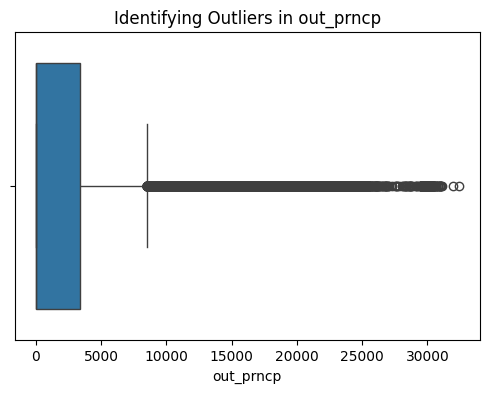

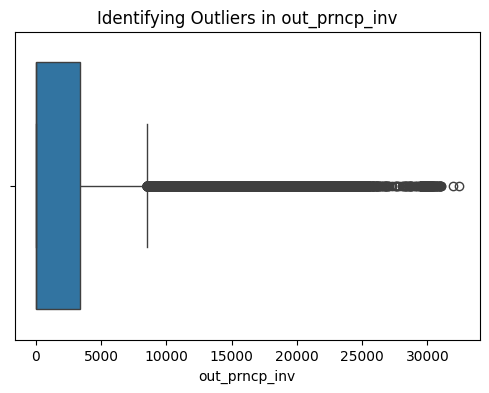

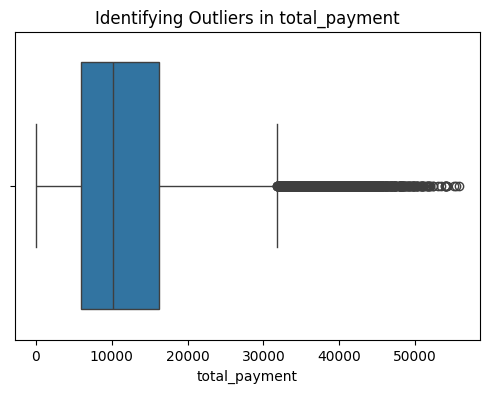

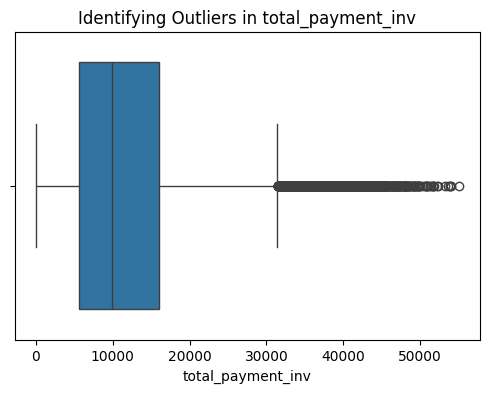

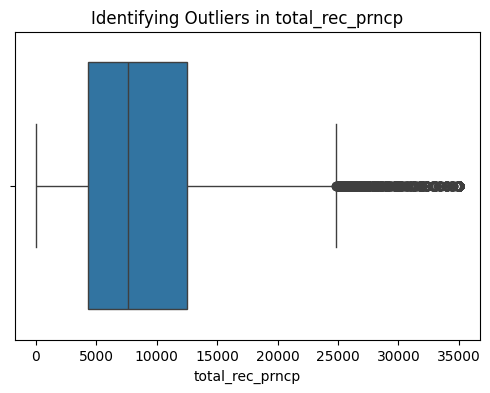

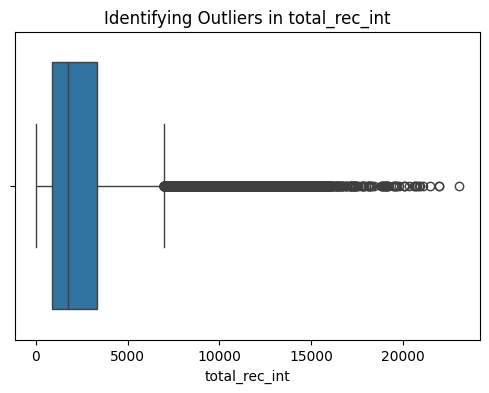

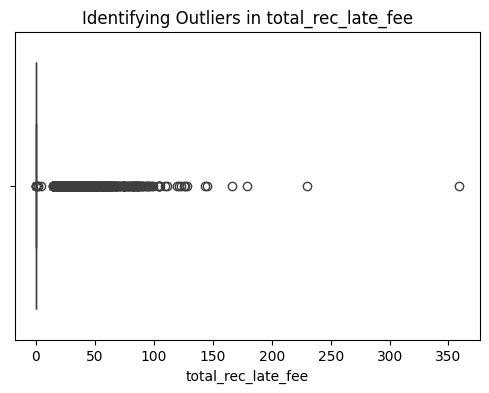

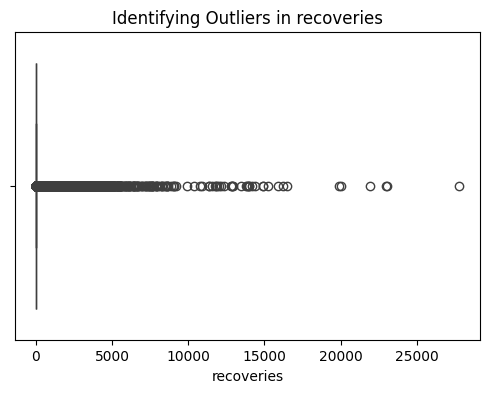

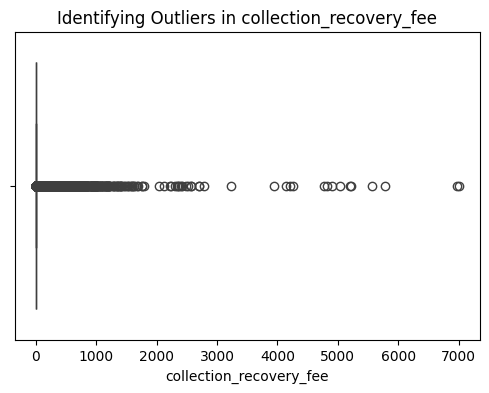

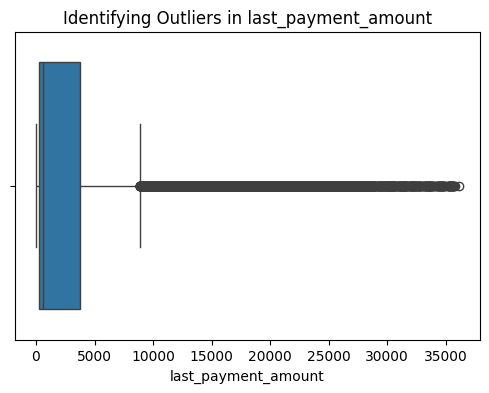

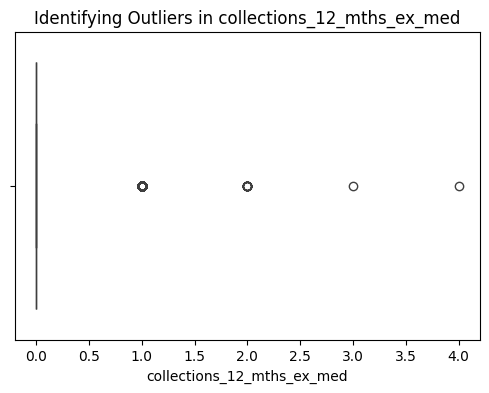

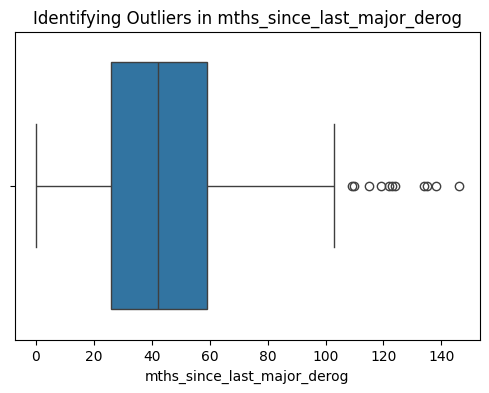

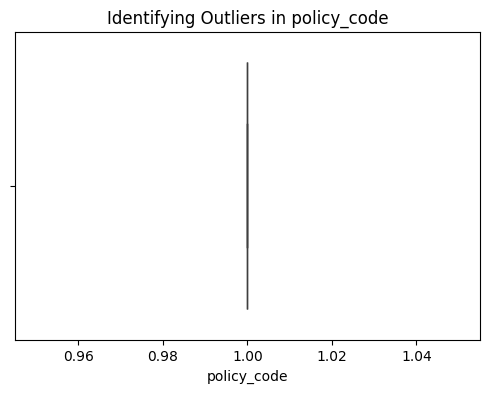

In [2]:
# Initialize Plotter class
plotter = Plotter()

# Visualize the data to identify potential outliers
plotter.visualize_outliers(df)

#Save a copy of this before removing outliers

## *Remove Outliers:*

In [6]:
#These are all crucial data points for custmer loans and can have implications on credit risk assessment etc, so I have deicded to keep all outliers.

## *Compute correlation matrix and visualise it:*

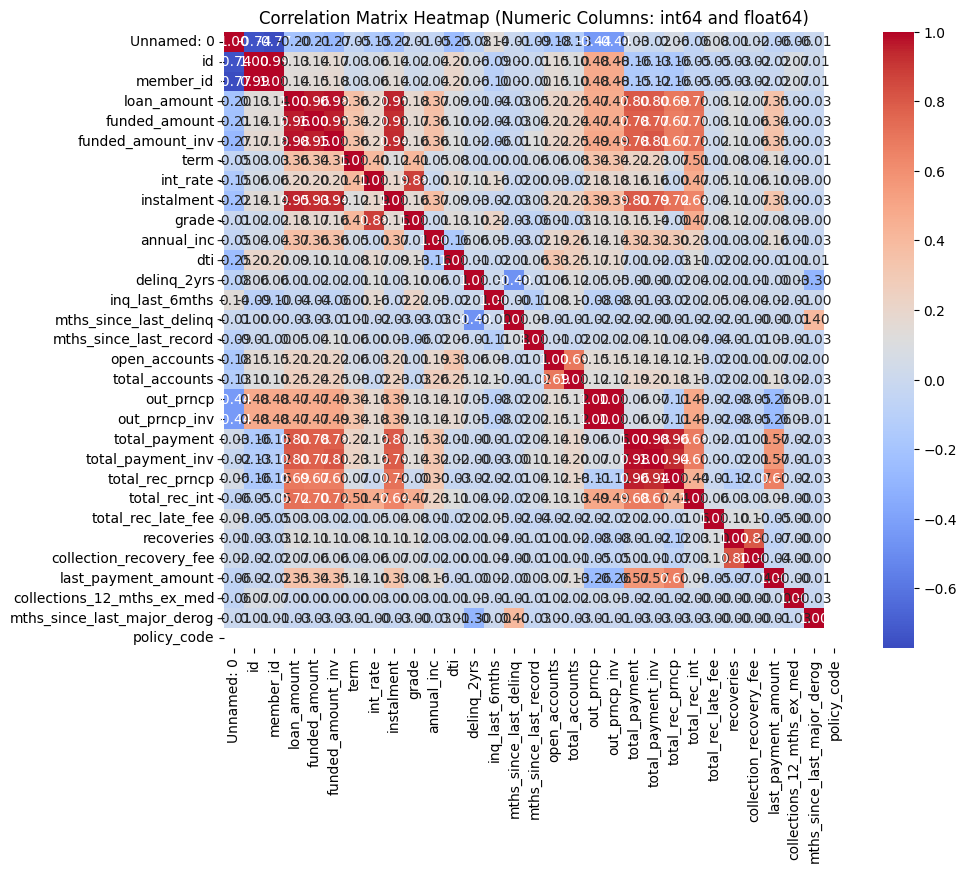

In [11]:
file_path = 'transformed_data.csv'
df = pd.read_csv(file_path)

# Visualize the correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Numeric Columns: int64 and float64)')
plt.show()

In [12]:
data_after_correlation_matrix = df.copy

## *Identify highly correlated columns:*

In [ ]:
def identify_highly_correlated(self, data, threshold=0.8):
        # Create a correlation matrix
        correlation_matrix = data.corr().abs()

        # Select upper triangle of correlation matrix
        upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

        # Find columns with correlation above threshold
        highly_correlated_cols = [column for column in upper.columns if any(upper[column] > threshold)]

        return highly_correlated_cols

## *Remove highly correlated columns:*

In [ ]:
transformer = DataFrameTransform()
filtered_df = transformer.remove_highly_correlated(df, identify_highly_correlated())